In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv')
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    Male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    Male  35.0      0      0   8.0500   

   Embarked  
0         3  
1         1  
2         3  
3         3  
4         3  


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


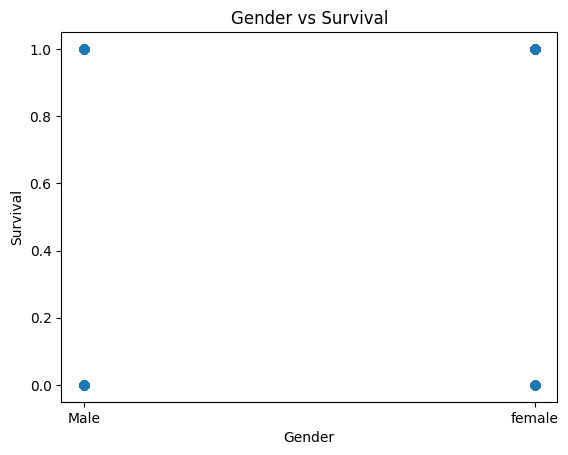

In [4]:
plt.scatter(df['Sex'], df['Survived'])
plt.title('Gender vs Survival')
plt.xlabel('Gender')
plt.ylabel('Survival')

plt.show()

In [5]:
df['Sex'] = df['Sex'].map({'Male': 0, 'female': 1})

In [6]:
X = df.drop(['Survived'], axis=1).values
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [7]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

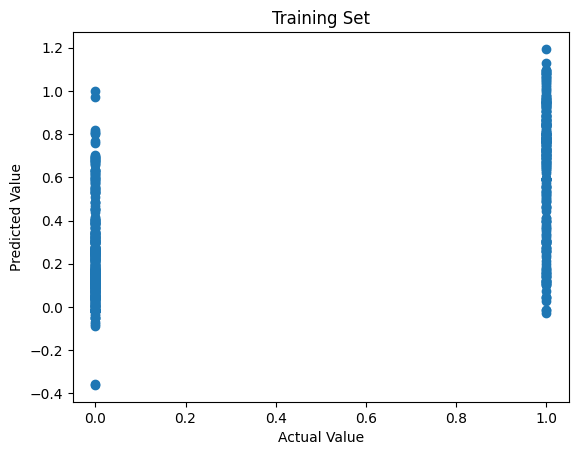

In [9]:
# Prediction on training set
plt.scatter(y_train, y_pred_train)
plt.title('Training Set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

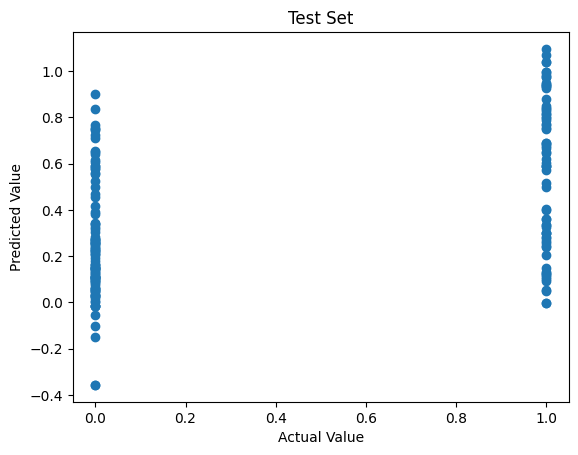

In [10]:
# test
plt.scatter(y_test, y_pred_test)
plt.title('Test Set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [11]:
print(regressor.score(X_test, y_test))

0.20987056446449692


In [12]:
import statsmodels.api as sm

In [13]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [14]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

array([ 8.25125729e-01, -5.72356200e-06, -1.34120039e-01,  5.43484325e-01,
       -4.22666075e-03, -3.88501897e-02, -2.63285893e-02,  3.33013571e-04,
       -6.16430855e-02])

In [15]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     66.79
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           3.18e-81
Time:                        16:58:40   Log-Likelihood:                -292.09
No. Observations:                 711   AIC:                             602.2
Df Residuals:                     702   BIC:                             643.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8251      0.087      9.486      0.0